# Memico logic

This simulation only considers an abstraction of the Memico pyramid. The state of the pyramid (ie. orientation of the bars) is stored in a list of lists of booleans.

First some imports and plotting functions to visualize the state.

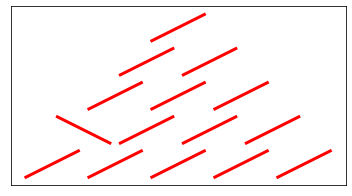

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plotLine(state,x,y,col='red'):
    if state:
        plt.plot([x-1,x+1],[y+0.5,y-0.5],lw=3,color=col)
    else:
        plt.plot([x-1,x+1],[y-0.5,y+0.5],lw=3,color=col)

def plotState(cells,out=None,col='red'):
    #hehe, this below could be more elegant:)
    axgap=1.3
    plt.figure()
    plotLine(cells[0][0],7,7+0*axgap,col)
    
    plotLine(cells[1][0],7-1.2,7-1*axgap,col)
    plotLine(cells[1][1],7+1.2,7-1*axgap,col)
    
    plotLine(cells[2][0],7-2.4,7-2*axgap,col)
    plotLine(cells[2][1],7,7-2*axgap,col)
    plotLine(cells[2][2],7+2.4,7-2*axgap,col)

    plotLine(cells[3][0],7-3.6,7-3*axgap,col)
    plotLine(cells[3][1],7-1.2,7-3*axgap,col)
    plotLine(cells[3][2],7+1.2,7-3*axgap,col)
    plotLine(cells[3][3],7+3.6,7-3*axgap,col)
    
    plotLine(cells[4][0],7-4.8,7-4*axgap,col)
    plotLine(cells[4][1],7-2.4,7-4*axgap,col)
    plotLine(cells[4][2],7,7-4*axgap,col)
    plotLine(cells[4][3],7+2.4,7-4*axgap,col)
    plotLine(cells[4][4],7+4.8,7-4*axgap,col)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xticks([])
    plt.yticks([])
    if out is not None:
        plt.savefig(out,dpi=150)
    plt.show()
    
cells = [[False],
         [False,False],
         [False,False,False],
         [True,False,False,False],
         [False,False,False,False,False]]

plotState(cells)



The scoring is a little arbitrary in the game, from left to right the scores are:

1,3,5,7,9,10,8,6,4,2

The following is just the logic of the simulation with visualizing one period. For this state, we see even a subperiod, when we essentially mirror the previous scores. From the distribution we can also note that within one period 1,2,3 and 4 only occurs once.

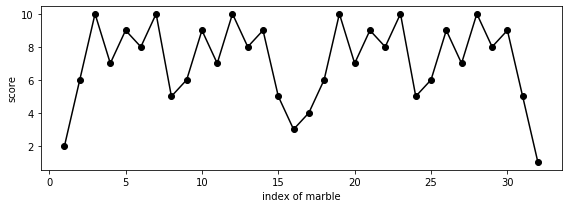

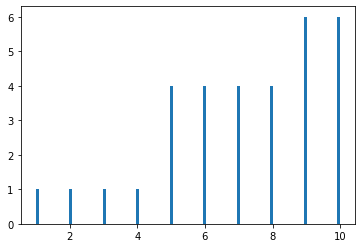

In [2]:
cells = [[True],
         [True,True],
         [True,True,True],
         [True,True,True,True],
         [True,True,True,True,True]]

#uncomment this for a random initial state
#cells = [[np.random.choice([True,False]) for i in range(j+1)] for j in range(5)]


scores=[1,3,5,7,9,10,8,6,4,2]

myScores=[]
for k in range(33):
#    plotState(cells,'memico_state%03d.png'%k) #uncomment this to visualize the states.
    i=0
    for j in range(5):
        idum=i
        celldum=cells[j][idum]
        i+=cells[j][i]
        cells[j][idum]=not cells[j][idum]
    
    myScores.append(scores[2*idum+celldum]) #this shows that i could go range(4), and handle with i

plt.figure(figsize=(8,3))
plt.plot(range(1,33),myScores[:-1],'ko-')
plt.ylabel('score')
plt.xlabel('index of marble')
plt.tight_layout()
#plt.savefig('memico_period.png',dpi=150)
plt.show()

plt.figure()
plt.hist(myScores[:-1],100)
plt.show()

Try with perturbed initial states.

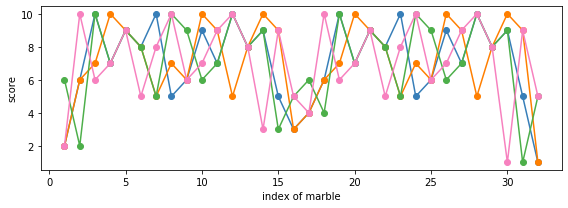

In [3]:

cellsU = [[True],
         [True,True],
         [True,True,True],
         [True,True,True,True],
         [True,True,True,True,True]]

cellsP1 = [[True],
         [True,True],
         [True,True,True],
         [True,False,True,True],
         [True,True,True,True,True]]

cellsP2 = [[False],
         [True,True],
         [True,True,True],
         [True,True,True,True],
         [True,True,True,True,True]]

cellsP3 = [[True],
         [False,True],
         [True,True,True],
         [True,True,True,True],
         [True,True,True,True,True]]

CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf']#https://gist.github.com/thriveth/8560036

plt.figure(figsize=(8,3))
kk=0
for cells,col in zip([cellsU,cellsP1,cellsP2,cellsP3],CB_color_cycle):
#   initial state to be plotted here, though notice that just uncommenting will break the outer figure.
#    plotState(cells,'memico_initialstate%d.png'%kk,col)
    kk+=1

    scores=[1,3,5,7,9,10,8,6,4,2]
    
    myScores=[]
    for k in range(33):
        i=0
        for j in range(5):
            idum=i
            celldum=cells[j][idum]
            i+=cells[j][i]
            cells[j][idum]=not cells[j][idum]
        myScores.append(scores[2*idum+celldum])
    
    
    plt.plot(range(1,33),myScores[:-1],'o-',color=col)
plt.ylabel('score')
plt.xlabel('index of marble')
plt.tight_layout()
#plt.savefig('memico_periodUP.png',dpi=150)
plt.show()